# House Price Prediction

In [1]:
%matplotlib inline

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

## About Dataset:
**1 - Price**: The price of the house.

**2 - Area**: The total area of the house in square feet.

**3 - Bedrooms**: The number of bedrooms in the house.

**4 - Bathrooms**: The number of bathrooms in the house.

**5 - Stories**: The number of stories in the house.

**6 - Mainroad**: Whether the house is connected to the main road (Yes/No).

**7 - Guestroom**: Whether the house has a guest room (Yes/No).

**8 - Basement**: Whether the house has a basement (Yes/No).

**9 - Hot water heating**: Whether the house has a hot water heating system (Yes/No).

**10 - Airconditioning**: Whether the house has an air conditioning system (Yes/No).

**11 - Parking**: The number of parking spaces available within the house.

**12 - Prefarea**: Whether the house is located in a preferred area (Yes/No).

**13 - Furnishing status**: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

## Loading the Data

In [3]:
housing_data = pd.read_csv('Housing.csv')

In [4]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing_data.shape

(545, 13)

In [6]:
housing_data.info() # Data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Count the number of missing values (NaN)
There in no missing values

In [7]:
housing_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Column Type

In [8]:
num_cols = housing_data.describe().columns
categorical_cols = housing_data.describe(include = 'O').columns

print('Numerical columns are: ', num_cols)
print()
print('Categorical columns are: ', categorical_cols)

Numerical columns are:  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

Categorical columns are:  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [9]:
housing_data['furnishingstatus'].unique() # Unique values present in the 'furnishingstatus' column 

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### Statistical summary of the numeric columns in DataFrame:

**Count**: Number of non-null values.

**Mean**: Mean (average) value.

**Std**: Standard deviation, a measure of the amount of variation or dispersion.

**Min**: Minimum value.

**25% (Percentile)**: The 25th percentile, also known as the first quartile.

**50% (Percentile)**: The median or 50th percentile.

**75% (Percentile)**: The 75th percentile, also known as the third quartile.

**Max**: Maximum value.

In [10]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Visualization

### Heatmap

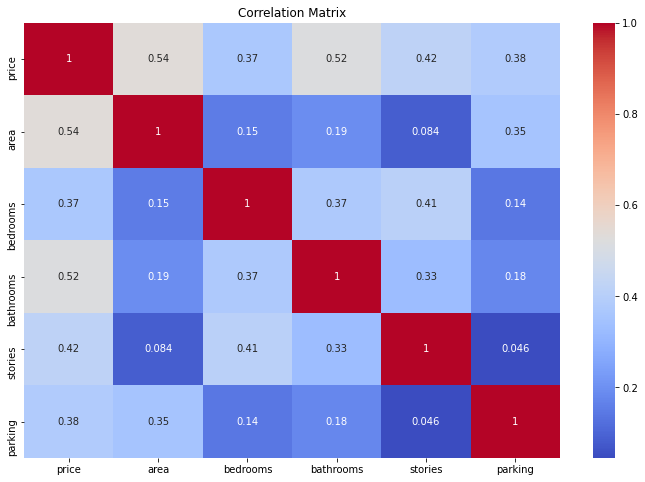

In [11]:
correlation_matrix = housing_data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Scatter plots

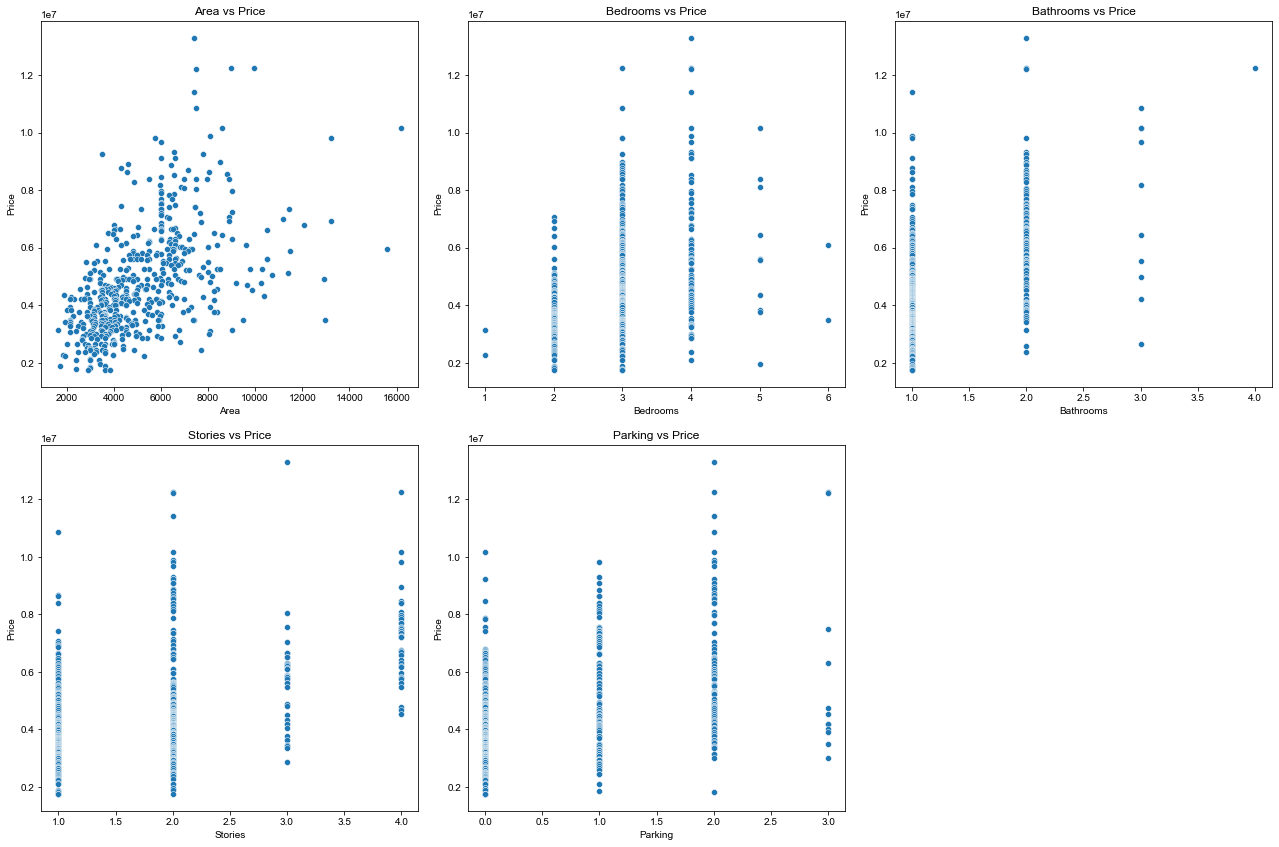

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))

sns.scatterplot(x = 'area' , y = 'price', data = housing_data, ax = axes[0, 0])
axes[0, 0].set_title('Area vs Price')
axes[0, 0].set_xlabel('Area')
axes[0, 0].set_ylabel('Price')

sns.scatterplot(x = 'bedrooms' , y = 'price', data = housing_data, ax = axes[0, 1])
axes[0, 1].set_title('Bedrooms vs Price')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Price')

sns.scatterplot(x = 'bathrooms' , y = 'price', data = housing_data, ax = axes[0, 2])
axes[0, 2].set_title('Bathrooms vs Price')
axes[0, 2].set_xlabel('Bathrooms')
axes[0, 2].set_ylabel('Price')

sns.scatterplot(x = 'stories' , y = 'price', data = housing_data, ax = axes[1, 0])
axes[1, 0].set_title('Stories vs Price')
axes[1, 0].set_xlabel('Stories')
axes[1, 0].set_ylabel('Price')

sns.scatterplot(x = 'parking' , y = 'price', data = housing_data, ax = axes[1, 1])
axes[1, 1].set_title('Parking vs Price')
axes[1, 1].set_xlabel('Parking')
axes[1, 1].set_ylabel('Price')

axes[1, 2].axis('off')
    
sns.set(font_scale = 1.2)

plt.tight_layout()
plt.show()

### Handling Outliers

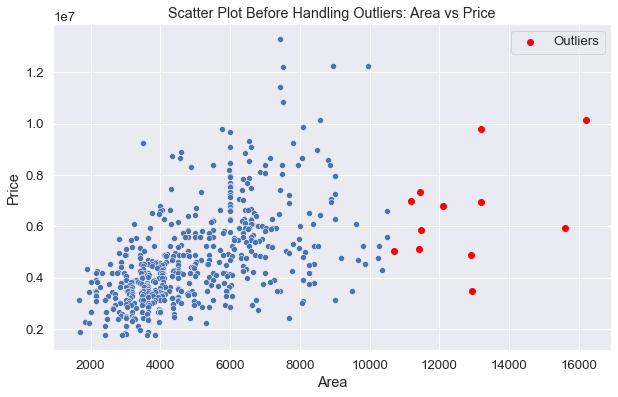

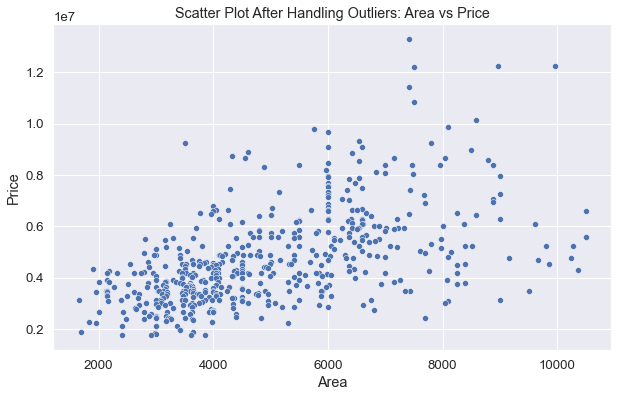

In [13]:
plt.figure(figsize = (10, 6))

sns.scatterplot(x = 'area', y = 'price', data = housing_data)
plt.title('Scatter Plot Before Handling Outliers: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

Q1 = housing_data['area'].quantile(0.25)
Q3 = housing_data['area'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = housing_data[(housing_data['area'] < lower_limit) | (housing_data['area'] > upper_limit)]

plt.scatter(x=outliers['area'], y=outliers['price'], color='red', marker='o', label='Outliers')

plt.legend()
plt.show()


plt.figure(figsize = (10, 6))

housing_data_no_outliers = housing_data[(housing_data['area'] >= lower_limit) & (housing_data['area'] <= upper_limit)]
sns.scatterplot(x = 'area', y = 'price', data = housing_data_no_outliers)
plt.title('Scatter Plot After Handling Outliers: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

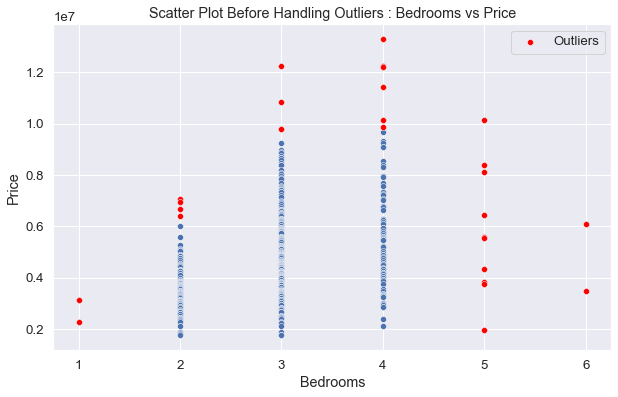

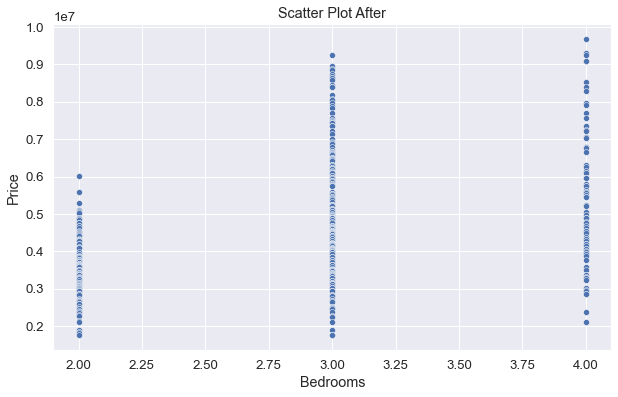

In [14]:
plt.figure(figsize = (10, 6))

sns.scatterplot(x = 'bedrooms', y = 'price', data = housing_data)

X = housing_data[['bedrooms', 'price']]
isolation_forest = IsolationForest(contamination = 0.05)
housing_data['Outlier'] = isolation_forest.fit_predict(X)

outliers = housing_data[housing_data['Outlier'] == -1]
sns.scatterplot(x = 'bedrooms', y = 'price', data = outliers, color = 'red', label = 'Outliers')

plt.title('Scatter Plot Before Handling Outliers : Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))

filtered_data = housing_data[housing_data['Outlier'] == 1]
sns.scatterplot(x = 'bedrooms', y = 'price', data = filtered_data)

plt.title('Scatter Plot After')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

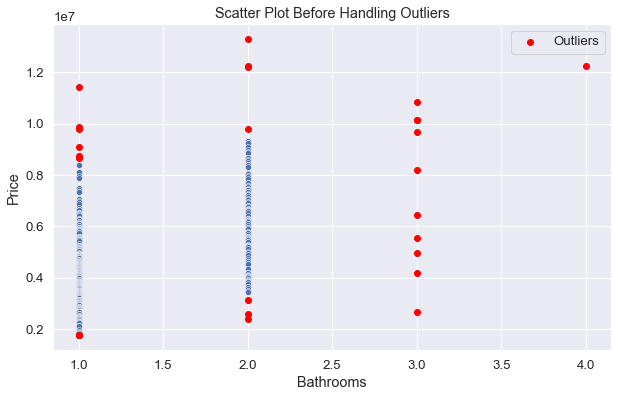

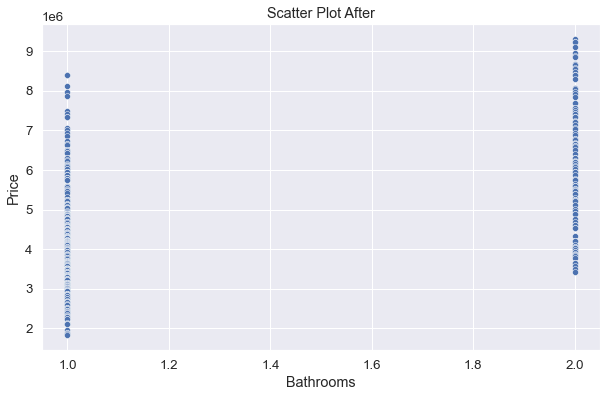

In [15]:
plt.figure(figsize = (10, 6))

sns.scatterplot(x = 'bathrooms', y = 'price', data = housing_data)
plt.title('Scatter Plot Before Handling Outliers')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

X = housing_data[['bathrooms', 'price']]
isolation_forest = IsolationForest(contamination=0.05)  
housing_data['Outlier'] = isolation_forest.fit_predict(X)

outliers = housing_data[housing_data['Outlier'] == -1]

plt.scatter(x=outliers['bathrooms'], y = outliers['price'], color = 'red', marker = 'o', label = 'Outliers')

plt.legend()
plt.show()

plt.figure(figsize = (10, 6))

filtered_data = housing_data[housing_data['Outlier'] == 1]
sns.scatterplot(x = 'bathrooms', y = 'price', data = filtered_data)
plt.title('Scatter Plot After')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

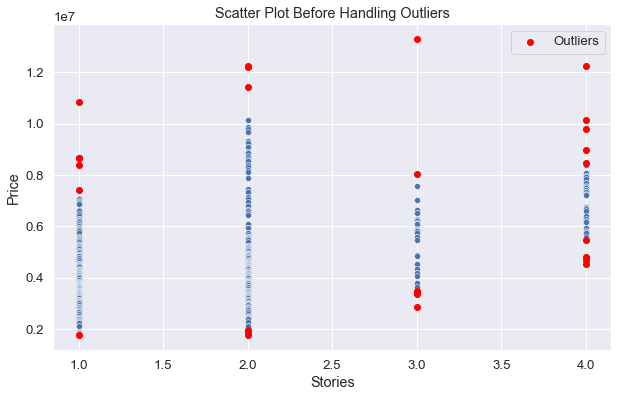

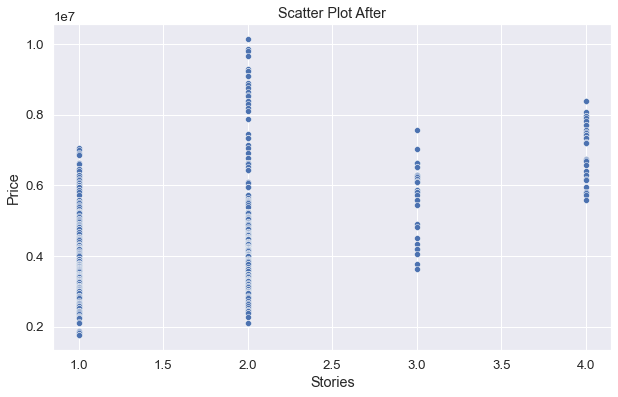

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x = 'stories', y = 'price', data = housing_data)
plt.title('Scatter Plot Before Handling Outliers')
plt.xlabel('Stories')
plt.ylabel('Price')

X = housing_data[['stories', 'price']]
isolation_forest = IsolationForest(contamination = 0.05)  
housing_data['Outlier'] = isolation_forest.fit_predict(X)

outliers = housing_data[housing_data['Outlier'] == -1]

plt.scatter(x = outliers['stories'], y = outliers['price'], color = 'red', marker = 'o', label = 'Outliers')

plt.legend()
plt.show()

plt.figure(figsize = (10, 6))

filtered_data = housing_data[housing_data['Outlier'] == 1]
sns.scatterplot(x = 'stories', y = 'price', data = filtered_data)
plt.title('Scatter Plot After')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()

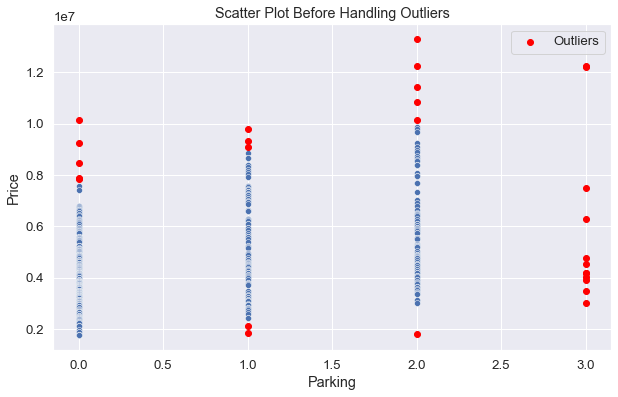

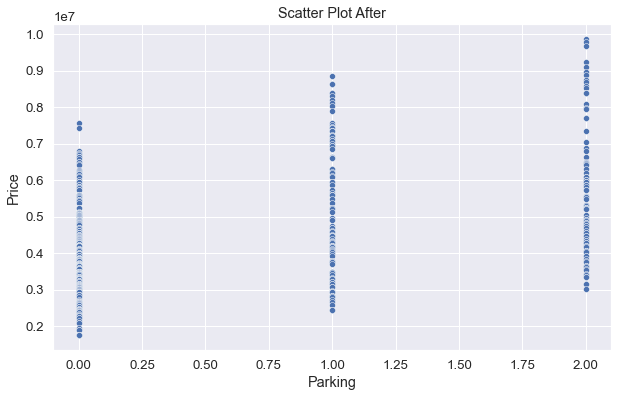

In [17]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x = 'parking', y = 'price', data = housing_data)
plt.title('Scatter Plot Before Handling Outliers')
plt.xlabel('Parking')
plt.ylabel('Price')

X = housing_data[['parking', 'price']]
isolation_forest = IsolationForest(contamination = 0.05)  
housing_data['Outlier'] = isolation_forest.fit_predict(X)

outliers = housing_data[housing_data['Outlier'] == -1]

plt.scatter(x = outliers['parking'], y = outliers['price'], color = 'red', marker = 'o', label = 'Outliers')

plt.legend()
plt.show()

plt.figure(figsize = (10, 6))

filtered_data = housing_data[housing_data['Outlier'] == 1]
sns.scatterplot(x = 'parking', y = 'price', data = filtered_data)
plt.title('Scatter Plot After')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()

In [18]:
print(housing_data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking     Outlier  
count  545.000000  545.000000  
mean     0.693578    0.897248  
std      0.861586    0.441933  
min      0.000000   -1.000000  
25%      0.000000    1.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max      3.000000    1.000000  


### Feature Engineering

In [19]:
housing_data['total_area'] = housing_data['area'] * housing_data['bedrooms'] #new feature: Total area
housing_data['bathrooms_per_bedroom'] = housing_data['bathrooms'] / housing_data['bedrooms'] # new feature: Bathrooms per bedroom

### Standardization

In [20]:
scaler = StandardScaler()
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_area', 'bathrooms_per_bedroom']
housing_data[numerical_features] = scaler.fit_transform(housing_data[numerical_features])

### Categorical Encoding

In [21]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()

for col in binary_columns:
    housing_data[col] = housing_data[col].map({'yes': 1, 'no': 0})

furnishing_status_ohe = pd.get_dummies(housing_data['furnishingstatus'], prefix = 'furnishing')
housing_data = pd.concat([housing_data, furnishing_status_ohe], axis = 1)
housing_data.drop('furnishingstatus', axis = 1, inplace = True)

print(housing_data.head())

      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217         1          0   
1  4.004484  1.757010  1.403419   5.405809  2.532024         1          0   
2  4.004484  2.218232  0.047278   1.421812  0.224410         1          0   
3  3.985755  1.083624  1.403419   1.421812  0.224410         1          0   
4  3.554979  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  Outlier  \
0         0                0                1  1.517692         1       -1   
1         0                0                1  2.679409         0       -1   
2         1                0                0  1.517692         1       -1   
3         1                0                1  2.679409         1       -1   
4         1                0                1  1.517692         0       -1   

   total_area  bathrooms_per_bedroom  furnishing_furnished  \
0    1

### Test / Train split data

In [22]:
X = housing_data.drop('price', axis = 1)
y = housing_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### LinearRegression

Metrics for Linear Regression:
Mean Absolute Error (MAE): 0.5169295859024171
Mean Squared Error (MSE): 0.4882870112025935
R-squared: 0.6626499979271014


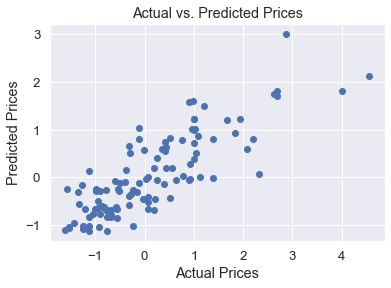

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Metrics for Linear Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

### Decision Tree (DT):

Metrics for Decision Tree:
Mean Absolute Error (MAE): 0.6389120544315272
Mean Squared Error (MSE): 0.7717869637750301
R-squared : 0.46678423169991634


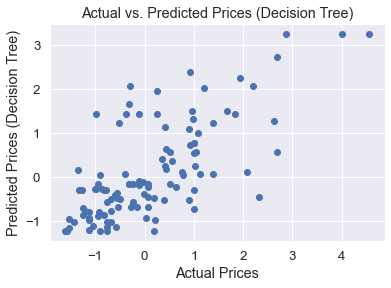

In [24]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Metrics for Decision Tree:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, dt_predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, dt_predictions)}")
print(f"R-squared : {r2_score(y_test, dt_predictions)}")

plt.scatter(y_test, dt_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual vs. Predicted Prices (Decision Tree)")
plt.show()

### Support Vector Machine (SVM):

Metricks for Support Vector Machine:
Mean Absolute Error (MAE): 0.5353607511409855
Mean Squared Error (MSE): 0.5288117106733039
R-squared : 0.6346521050141246


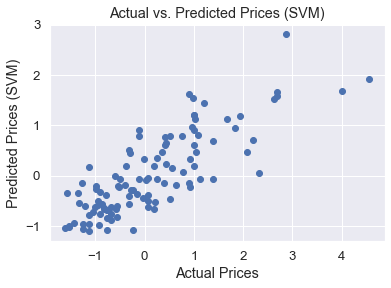

In [25]:
svm_model = SVR(kernel='linear') 
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("Metricks for Support Vector Machine:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, svm_predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, svm_predictions)}")
print(f"R-squared : {r2_score(y_test, svm_predictions)}")

plt.scatter(y_test, svm_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (SVM)")
plt.title("Actual vs. Predicted Prices (SVM)")
plt.show()

### k-Nearest Neighbors (KNN):

Metrics for k-Nearest Neighbors:
Mean Absolute Error (MAE): 0.5558573019609225
Mean Squared Error (MSE): 0.5923627545887864
R-squared (R²): 0.5907456641202306


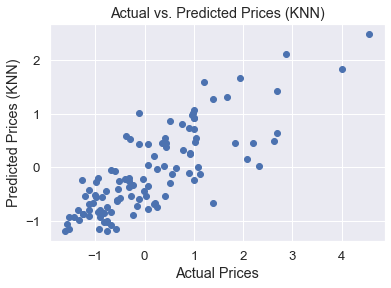

In [26]:
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("Metrics for k-Nearest Neighbors:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, knn_predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, knn_predictions)}")
print(f"R-squared (R²): {r2_score(y_test, knn_predictions)}")

plt.scatter(y_test, knn_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (KNN)")
plt.title("Actual vs. Predicted Prices (KNN)")
plt.show()

### Improving models

### Hyperparameter tuning

In [27]:
dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeRegressor(random_state = 42)

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv = 5, scoring = 'neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

best_params_dt = dt_grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv = 5, scoring = 'neg_mean_squared_error')
svm_grid_search.fit(X_train, y_train)

best_params_svm = svm_grid_search.best_params_
print("Best Parameters for SVM:", best_params_svm)

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv = 5, scoring = 'neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

best_params_knn = knn_grid_search.best_params_
print("Best Parameters for k-Nearest Neighbors:", best_params_knn)

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for k-Nearest Neighbors: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [28]:
best_dt_model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
best_dt_model.fit(X_train, y_train)
y_dt_pred = best_dt_model.predict(X_test)

best_svm_model = SVR(C = 1, gamma = 'scale', kernel = 'linear')
best_svm_model.fit(X_train, y_train)
y_svm_pred = best_svm_model.predict(X_test)

best_knn_model = KNeighborsRegressor(n_neighbors = 5, p = 1, weights = 'distance')
best_knn_model.fit(X_train, y_train)
y_knn_pred = best_knn_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nMetrics for {model_name}:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R-squared:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_dt_pred, "Decision Tree")
evaluate_model(y_test, y_svm_pred, "Support Vector Machine")
evaluate_model(y_test, y_knn_pred, "k-Nearest Neighbors")


Metrics for Decision Tree:
Mean Absolute Error (MAE): 0.6103556814580892
Mean Squared Error (MSE): 0.672001170447182
R-squared: 0.5357247048513278

Metrics for Support Vector Machine:
Mean Absolute Error (MAE): 0.5353607511409855
Mean Squared Error (MSE): 0.5288117106733039
R-squared: 0.6346521050141246

Metrics for k-Nearest Neighbors:
Mean Absolute Error (MAE): 0.5552611297632432
Mean Squared Error (MSE): 0.5675384389755777
R-squared: 0.6078964027871241


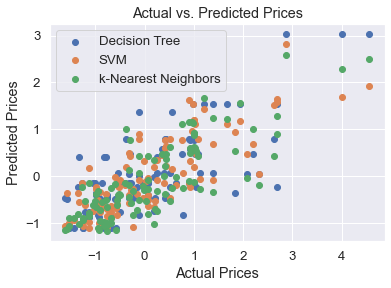

In [29]:
plt.scatter(y_test, y_dt_pred, label = 'Decision Tree')
plt.scatter(y_test, y_svm_pred, label = 'SVM')
plt.scatter(y_test, y_knn_pred, label = 'k-Nearest Neighbors')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Actual vs. Predicted Prices")
plt.show()

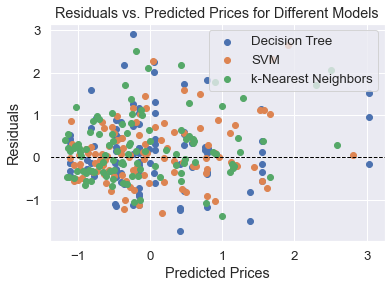

In [30]:
residual_dt = y_test - y_dt_pred
residual_svm = y_test - y_svm_pred
residual_knn = y_test - y_knn_pred

plt.scatter(y_dt_pred, residual_dt, label = 'Decision Tree')
plt.scatter(y_svm_pred, residual_svm, label = 'SVM')
plt.scatter(y_knn_pred, residual_knn, label = 'k-Nearest Neighbors')
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals vs. Predicted Prices for Different Models")
plt.show()

### Gradient Boosting

In [31]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Metrics for Gradient Boosting:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("R-squared :", r2_score(y_test, y_pred_gb))

Metrics for Gradient Boosting:
Mean Absolute Error (MAE): 0.5147860658521075
Mean Squared Error (MSE): 0.46036870300450056
R-squared : 0.6819383285859542


### References : https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction